/var/folders/7q/s4f74fls0q32fyzdgz0hpjc40000gn/T/ipykernel_46323/1815833096.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


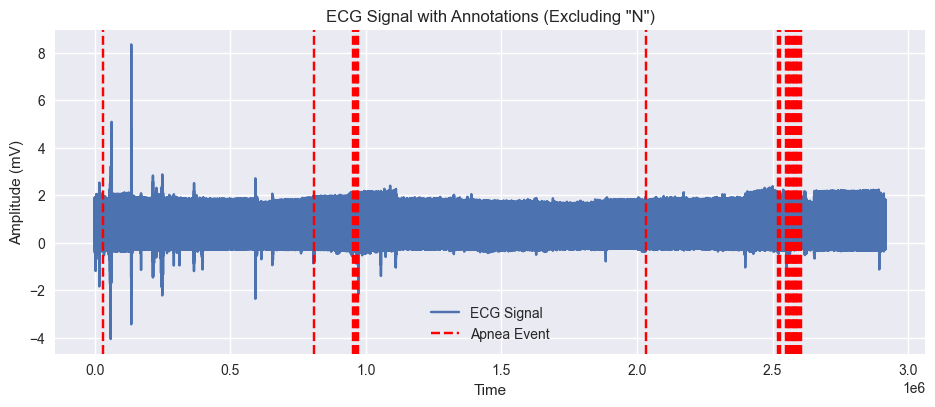

In [99]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

recordname = "apnea-ecg-database-1.0.0/b01"

# Read the ECG record
record = wfdb.rdsamp(recordname)
signal, fields = record

# Read the annotations
annotation = wfdb.rdann(recordname, 'apn')

# Plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(signal, label="ECG Signal")

plt.plot([], color='red', linestyle='--', label='Apnea Event')


# Plot the annotations where symbol is not "N"
for symbol, annotation_index in zip(annotation.symbol, annotation.sample):
    if symbol != 'N':
        plt.axvline(x=annotation_index, color='red', linestyle='--')
        label_added = True



plt.xlabel('Time')
plt.ylabel('Amplitude (mV)')
plt.title('ECG Signal with Annotations (Excluding "N")')
plt.legend()
plt.show();


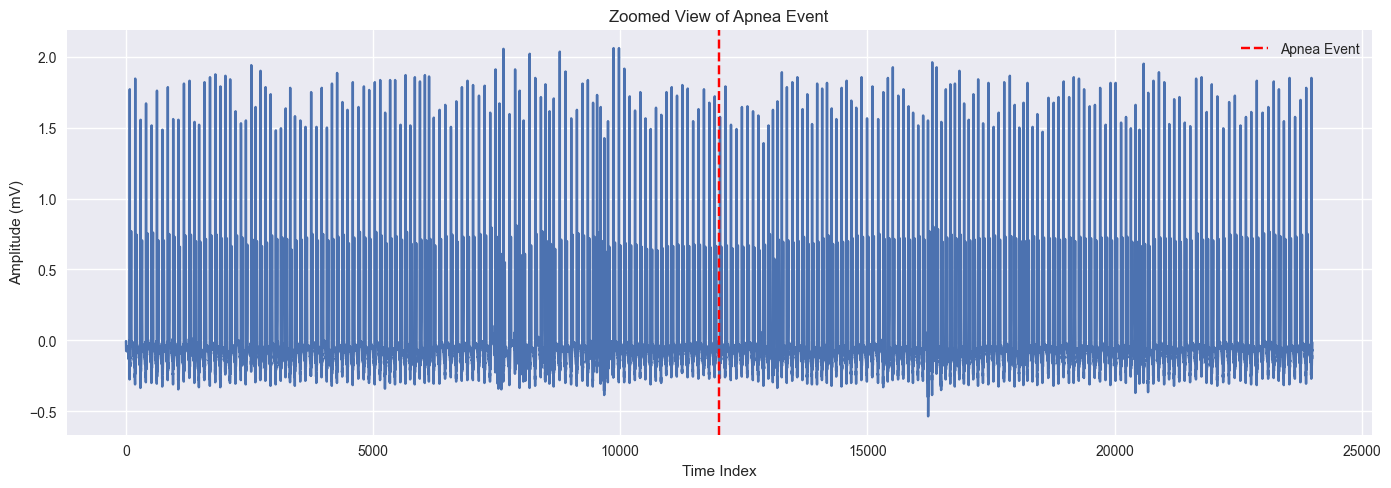

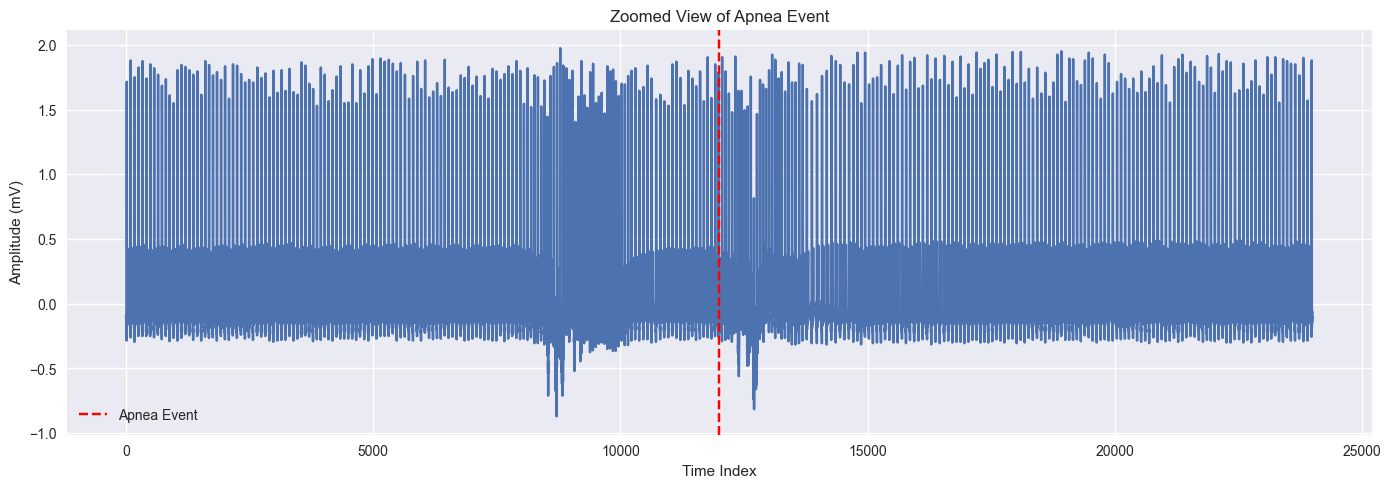

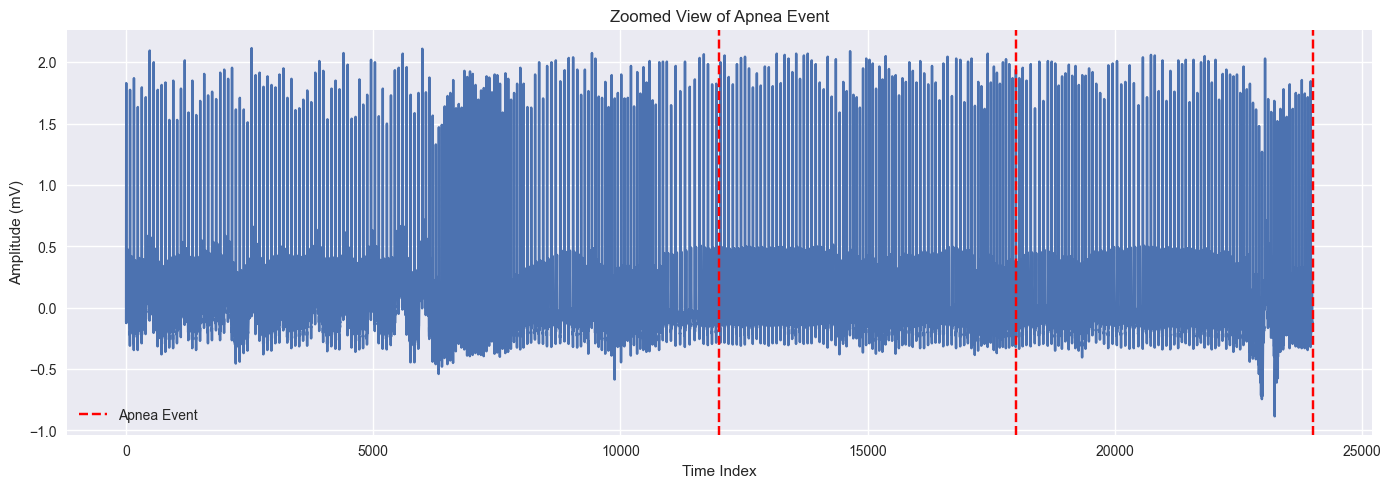

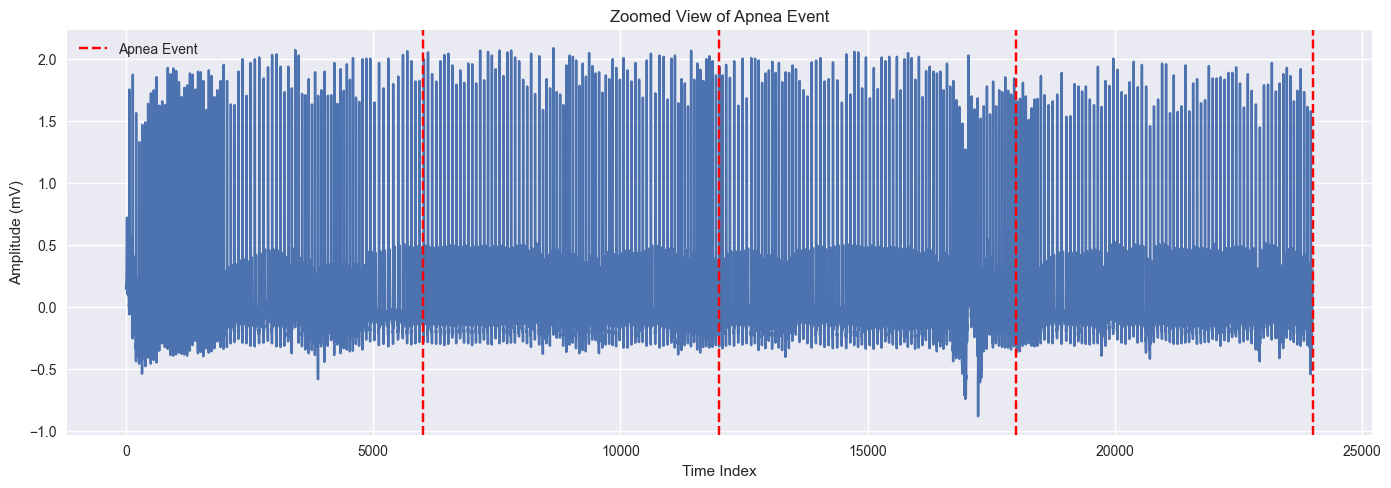

In [98]:
count_of_plots =0 
max_plots =3
# Identify the first region where symbol is not 'N' and zoom into it
for symbol, annotation_index in zip(annotation.symbol, annotation.sample):
    if symbol != 'N':
        window_size = 12000  # Choose a suitable window size for zooming
        start_index = max(0, annotation_index - window_size)
        end_index = min(annotation_index + window_size, len(signal))

        # Plot the zoomed region
        plt.figure(figsize=[15, 5])
        plt.plot(signal[start_index:end_index])
        plt.plot([], color='red', linestyle='--', label='Apnea Event')
        plt.title('Zoomed View of Apnea Event')
        plt.xlabel('Time Index')
        plt.ylabel('Amplitude (mV)')
        plt.legend()
        
        # Plot the annotations in the zoomed region
        for symbol, annotation_index in zip(annotation.symbol, annotation.sample):
            if start_index <= annotation_index <= end_index and symbol != 'N':
                plt.axvline(x=annotation_index - start_index, color='red', linestyle='--', label='Apnea Event')

        count_of_plots = count_of_plots+1
        
        if count_of_plots>max_plots:
            break
    


        
        


plt.show()


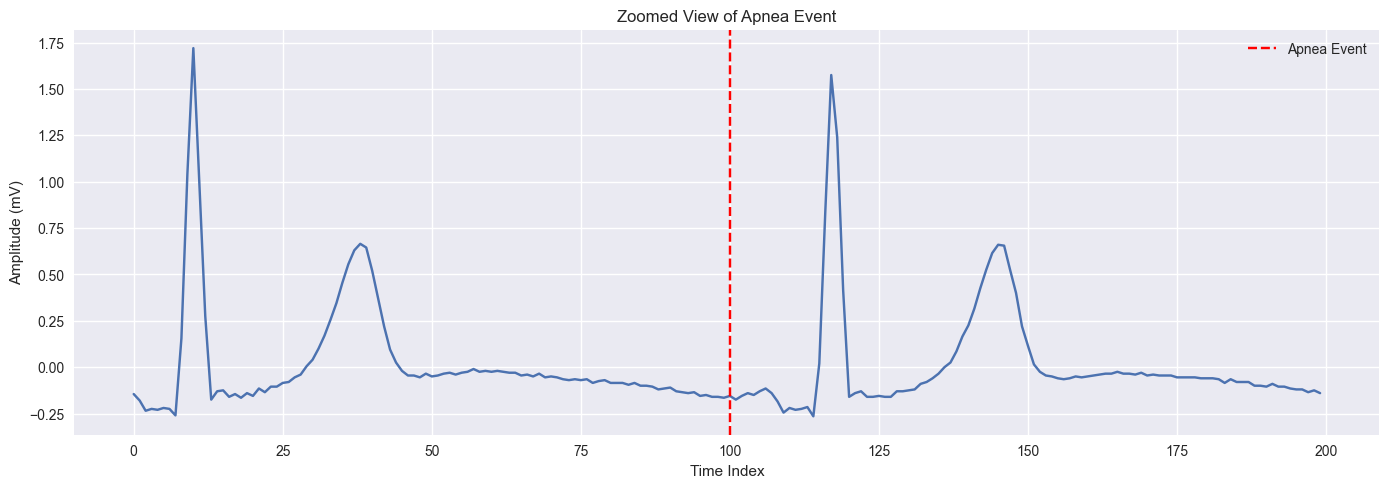

In [94]:
# Identify the first region where symbol is not 'N' and zoom into it
for symbol, annotation_index in zip(annotation.symbol, annotation.sample):
    if symbol != 'N':
        window_size = 100  # Choose a suitable window size for zooming
        start_index = max(0, annotation_index - window_size)
        end_index = min(annotation_index + window_size, len(signal))

        # Plot the zoomed region
        plt.figure(figsize=[15, 5])
        plt.plot(signal[start_index:end_index])
        plt.plot([], color='red', linestyle='--', label='Apnea Event')
        plt.title('Zoomed View of Apnea Event')
        plt.xlabel('Time Index')
        plt.ylabel('Amplitude (mV)')
        plt.legend()
        
        # Plot the annotations in the zoomed region
        for symbol, annotation_index in zip(annotation.symbol, annotation.sample):
            if start_index <= annotation_index <= end_index and symbol != 'N':
                plt.axvline(x=annotation_index - start_index, color='red', linestyle='--', label='Apnea Event')
                
        break
       
    


        
        


plt.show()
